In [83]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from general_graph_utils_main import *
from steinberg_utils_3vertex import *

Figure 4D

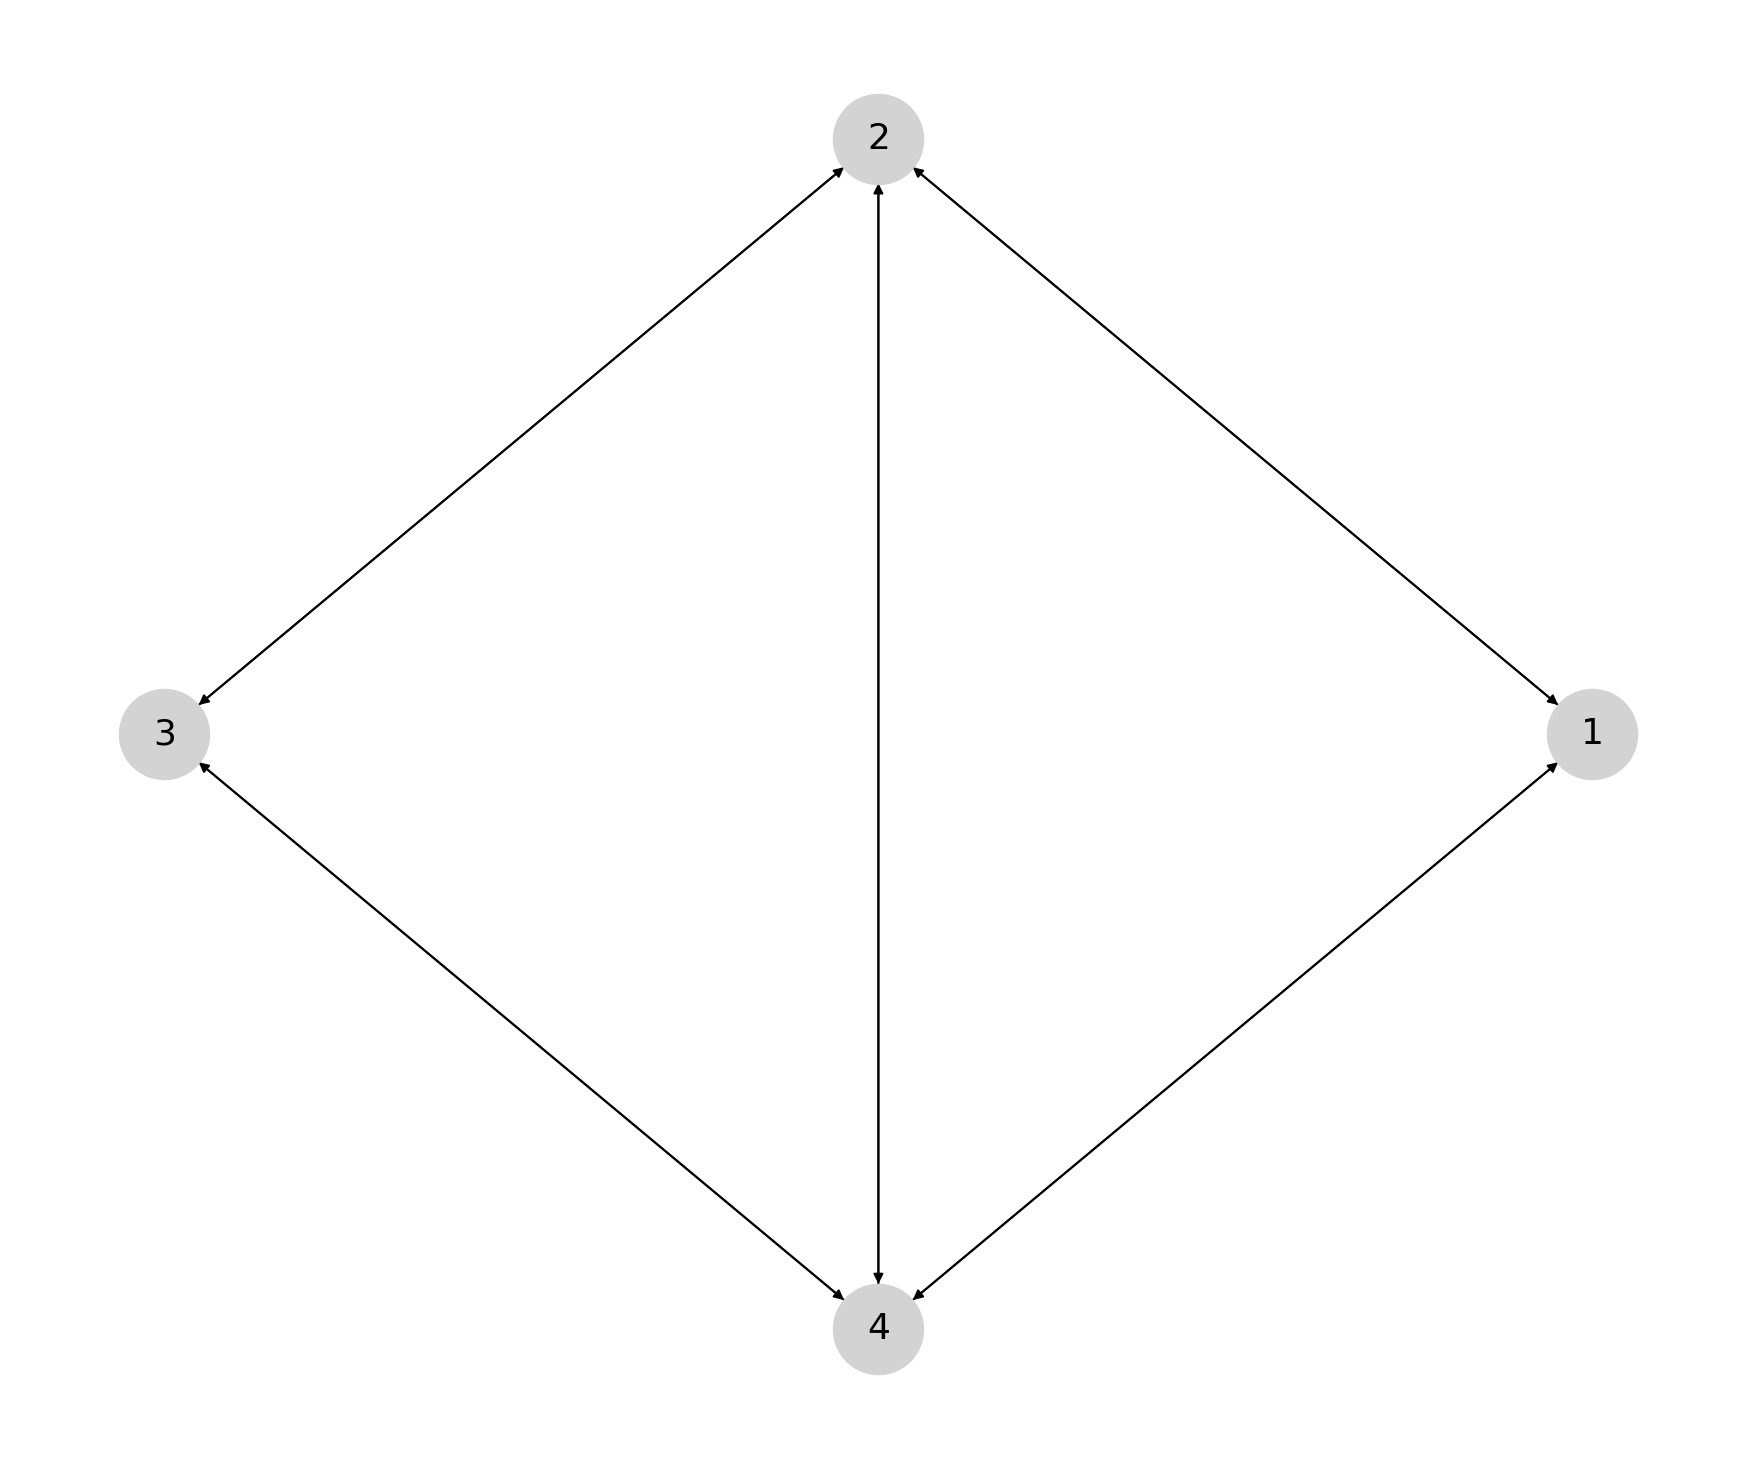

In [84]:
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1, 2)
G.add_edge(2, 1)
G.add_edge(1, 4)
G.add_edge(4, 1)
G.add_edge(3, 4)
G.add_edge(4, 3)
G.add_edge(3, 2)
G.add_edge(2, 3)
G.add_edge(4, 2)
G.add_edge(2, 4)

G_ud = nx.Graph()
G_ud.add_node(1)
G_ud.add_node(2)
G_ud.add_node(3)
G_ud.add_node(4)
G_ud.add_edge(1, 2)
G_ud.add_edge(2, 1)
G_ud.add_edge(1, 4)
G_ud.add_edge(4, 1)
G_ud.add_edge(3, 4)
G_ud.add_edge(4, 3)
G_ud.add_edge(3, 2)
G_ud.add_edge(2, 3)
G_ud.add_edge(4, 2)
G_ud.add_edge(2, 4)

nx.draw(G, 
        pos=nx.circular_layout(G), 
        with_labels=True, 
        node_size=2000, 
        node_color = 'lightgray', 
        font_size=18, 
        font_color='black', 
        font_family='sans-serif')

In [182]:
# all ones

edge_list = get_edges(G)        # list of (u,v) tuples
node_list = get_nodes(G)
# label the graph
label_dict,label_list = get_labels_ones(G,edge_list)
cycles = get_cycles(G_ud)
edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict)

print(label_dict)

# which edges are shared between cycles?
shared_edges, all_edges_f = shared_edges_cycles(cycles,
                                            edgesf,
                                            edgesb)

# set each cycle to thermodynamic equilibrium, output affinities
new_labelsf, edge_tracker, idx_tracker = equilibrium_params(cycles, edgesf, labelsf, labelsb, shared_edges)

# update graph's data structures 

# Update label_dict & build label_list in edge_list order:
new_label_dict, new_label_list = reformat_labels(edge_tracker,
                                                 idx_tracker,
                                                 new_labelsf,
                                                 label_dict,
                                                 edge_list)

label_dict = new_label_dict
label_list = new_label_list

edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict)
L  = Laplacian_all(edge_list, label_list, node_list)
pi = steady_state_spectrum(L)

perturb_edge = edgesf[1][1]
print(perturb_edge)

#----#

signal = make_observable(node_list)
alpha, beta  = 1, 3
tau = np.linspace(0.01, 200, num=1000)

{(1, 2): 1.0, (1, 4): 1.0, (2, 1): 1.0, (2, 3): 1.0, (2, 4): 1.0, (3, 4): 1.0, (3, 2): 1.0, (4, 1): 1.0, (4, 3): 1.0, (4, 2): 1.0}
Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: 0.0
(3, 4)


In [183]:
N = 2000
all_affinities = np.zeros((N,len(cycles)))
all_areas = np.zeros((N,1))

for i in tqdm(range(0,N)):
    
    # 1. update the edge label value for the chosen rate in label_dict, label_list    
    label_list = np.array([label_dict[e] for e in edge_list], dtype=float)
    edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict)
    
    # 2. update the Laplacian
    L = Laplacian_all(edge_list,label_list,node_list)
    
    # 3. calculate and store the affinity
    prodf, prodb = calculate_cycle_products(labelsf, labelsb)
    all_affinities[i] = calculate_affinities(prodf,prodb,cycles)
    
    # 4. calculate and store the Steinberg signature
    #tau, _ = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_spectrum(L)
    a13, a31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    all_areas[i] = numerical_area(a13,a31)
    
    # 5. perturb chosen parameter for next iteration
    label_dict[perturb_edge] *= 1.01

100%|███████████████████████████████████████| 2000/2000 [05:49<00:00,  5.72it/s]


In [184]:
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(12,10))
%config InlineBackend.figure_format = 'retina'

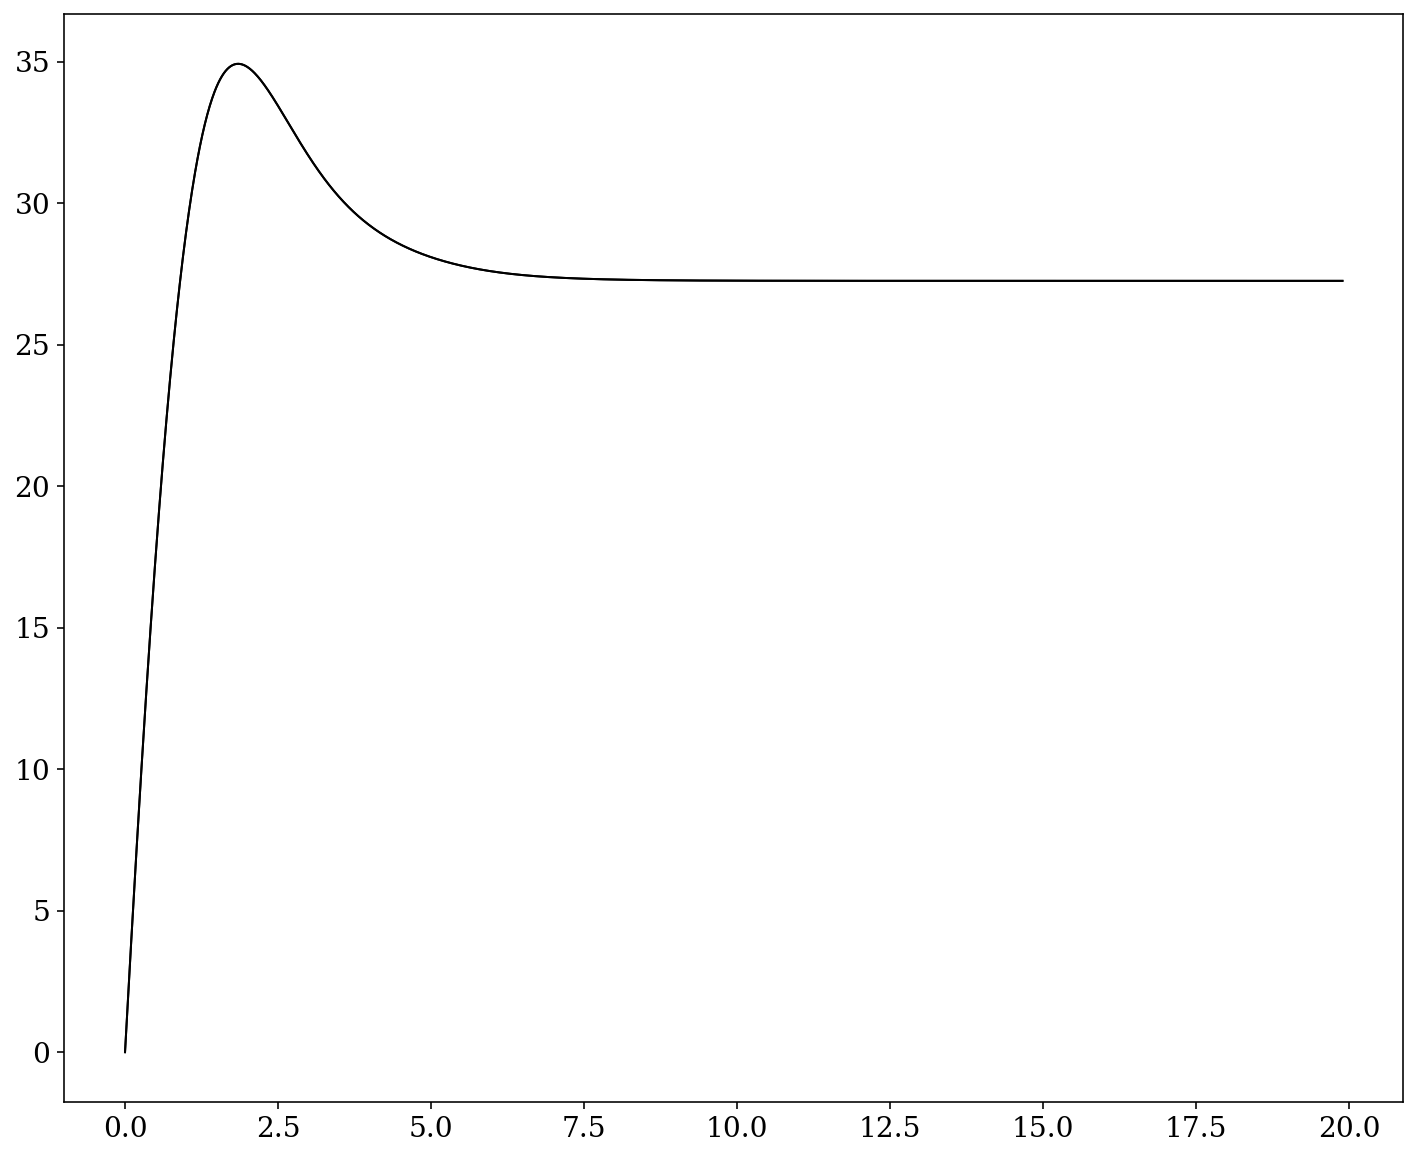

In [186]:
fig = plt.figure()
for i in range(len(cycles)):
    #plt.plot(np.abs(all_affinities[:,0]),all_areas,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=1, color= 'black')
    plt.plot(np.abs(all_affinities[:,1]),all_areas,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=1, color= 'black')
plt.show()
#fig.savefig('4v2c_allones.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

In [142]:
# param_set1

seed = 900 #np.random.choice(np.arange(1,1000), size=1)[0]
print(seed)

np.random.seed(seed)

edge_list = get_edges(G)        # list of (u,v) tuples
node_list = get_nodes(G)
# label the graph
label_dict1,label_list = get_labels(G,edge_list)
cycles = get_cycles(G_ud)
edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict1)

print(label_dict1)

# which edges are shared between cycles?
shared_edges, all_edges_f = shared_edges_cycles(cycles,
                                            edgesf,
                                            edgesb)

# set each cycle to thermodynamic equilibrium, output affinities
new_labelsf, edge_tracker, idx_tracker = equilibrium_params(cycles, edgesf, labelsf, labelsb, shared_edges)

# update graph's data structures 

# Update label_dict & build label_list in edge_list order:
new_label_dict, new_label_list = reformat_labels(edge_tracker,
                                                 idx_tracker,
                                                 new_labelsf,
                                                 label_dict1,
                                                 edge_list)

label_dict1 = new_label_dict
label_list = new_label_list

print(label_dict1)

edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict1)
L  = Laplacian_all(edge_list, label_list, node_list)
pi = steady_state_spectrum(L)

cycle_idx = 0
edge_idx = 2

print(edgesf)

perturb_edge = edgesf[cycle_idx][edge_idx]

print(perturb_edge)

#----#

signal = make_observable(node_list)
alpha, beta  = 1, 3
tau = np.linspace(0.01, 200, num=500)

900
{(1, 2): 0.3974, (1, 4): 0.06982, (2, 1): 1.847, (2, 3): 0.00793, (2, 4): 0.07091, (3, 4): 4.488, (3, 2): 0.04318, (4, 1): 0.002613, (4, 3): 0.03054, (4, 2): 0.01846}
Cycle 0 affinity after solve: 2.2204460492503128e-16
Cycle 1 affinity after solve: -3.33066907387547e-16
{(1, 2): 0.3974, (1, 4): 0.06982, (2, 1): 1.847, (2, 3): 0.0011286898281296167, (2, 4): 0.07091, (3, 4): 4.488, (3, 2): 0.04318, (4, 1): 0.0844778959300891, (4, 3): 0.03054, (4, 2): 0.01846}
[[(2, 4), (4, 1), (1, 2)], [(2, 3), (3, 4), (4, 2)]]
(1, 2)


In [36]:
N = 2000
all_affinities1 = np.zeros((N,len(cycles)))
all_areas1 = np.zeros((N,1))

for i in tqdm(range(0,N)):
    
    # 1. update the edge label value for the chosen rate in label_dict, label_list    
    label_list = np.array([label_dict1[e] for e in edge_list], dtype=float)
    edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict1)
    
    # 2. update the Laplacian
    L = Laplacian_all(edge_list,label_list,node_list)
    
    # 3. calculate and store the affinity
    prodf, prodb = calculate_cycle_products(labelsf, labelsb)
    all_affinities1[i] = calculate_affinities(prodf,prodb,cycles)
    
    # 4. calculate and store the Steinberg signature
    tau, _ = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_spectrum(L)
    a13, a31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    all_areas1[i] = numerical_area(a13,a31)
    
    # 5. perturb chosen parameter for next iteration 
    label_dict1[perturb_edge] *= 1.01

100%|███████████████████████████████████████| 2000/2000 [04:36<00:00,  7.23it/s]


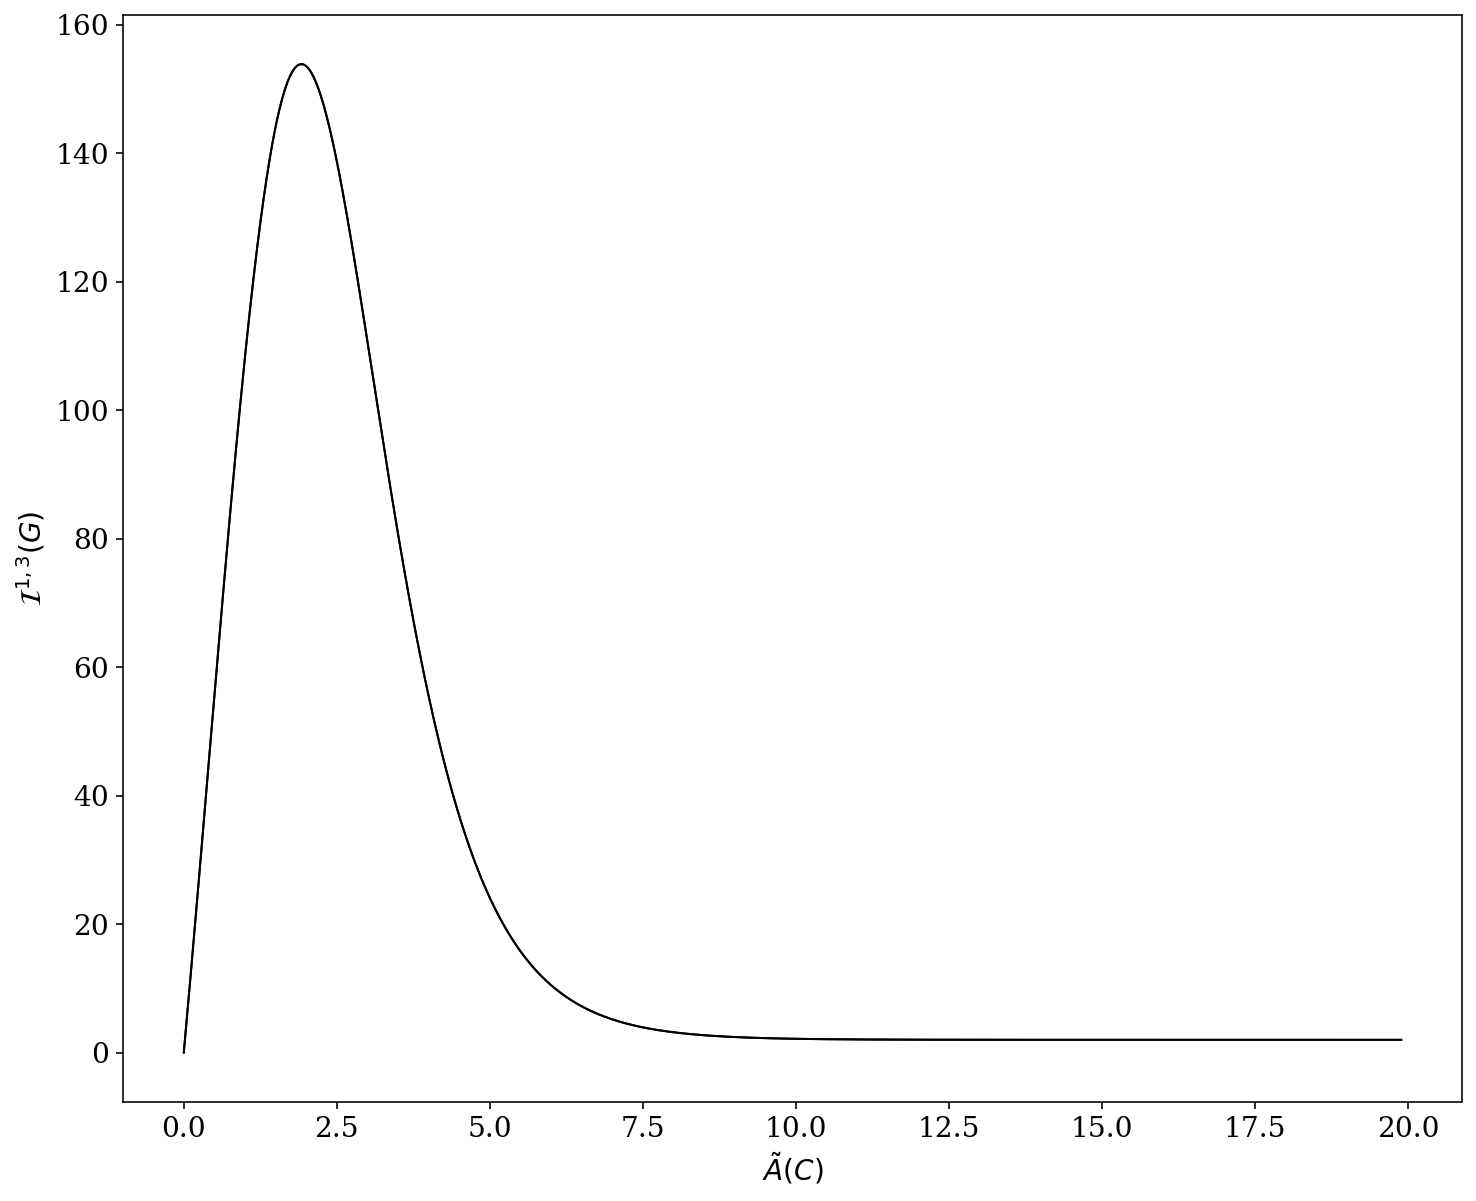

In [37]:
for i in range(len(cycles)):
    plt.plot(np.abs(all_affinities1[:,0]),all_areas1,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=1, color= 'black')
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()

In [227]:
# param_set2

#seed = np.random.choice(np.arange(1,1000), size=1)[0]
print(seed)
seed = 110
np.random.seed(seed)

edge_list = get_edges(G)        # list of (u,v) tuples
node_list = get_nodes(G)
# label the graph
label_dict2,label_list = get_labels(G,edge_list)
cycles = get_cycles(G_ud)
edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict2)

print(label_dict2)

# which edges are shared between cycles?
shared_edges, all_edges_f = shared_edges_cycles(cycles,
                                            edgesf,
                                            edgesb)

# set each cycle to thermodynamic equilibrium, output affinities
new_labelsf, edge_tracker, idx_tracker = equilibrium_params(cycles, edgesf, labelsf, labelsb, shared_edges)

# update graph's data structures 

# Update label_dict & build label_list in edge_list order:
new_label_dict, new_label_list = reformat_labels(edge_tracker,
                                                 idx_tracker,
                                                 new_labelsf,
                                                 label_dict2,
                                                 edge_list)

label_dict2 = new_label_dict
label_list = new_label_list

print(label_dict2)

edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict2)
L  = Laplacian_all(edge_list, label_list, node_list)
pi = steady_state_spectrum(L)

cycle_idx = 0
edge_idx = 2

print(edgesb)

perturb_edge = edgesb[cycle_idx][edge_idx]

print(perturb_edge)

#----#

signal = make_observable(node_list)
alpha, beta  = 1, 3
tau = np.linspace(0.01, 200, num=2000)

110
{(1, 2): 0.00497, (1, 4): 8.928, (2, 1): 0.1793, (2, 3): 4.75, (2, 4): 11.94, (3, 4): 12.44, (3, 2): 537.1, (4, 1): 6.658, (4, 3): 1.196, (4, 2): 0.003289}
Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: -1.1102230246251565e-16
{(1, 2): 0.00497, (1, 4): 8.928, (2, 1): 0.1793, (2, 3): 187459.0470622625, (2, 4): 11.94, (3, 4): 12.44, (3, 2): 537.1, (4, 1): 0.088723288231904, (4, 3): 1.196, (4, 2): 0.003289}
[[(4, 2), (1, 4), (2, 1)], [(3, 2), (4, 3), (2, 4)]]
(2, 1)


In [228]:
N = 2000
all_affinities2 = np.zeros((N,len(cycles)))
all_areas2 = np.zeros((N,1))

for i in tqdm(range(0,N)):
    
    # 1. update the edge label value for the chosen rate in label_dict, label_list    
    label_list = np.array([label_dict2[e] for e in edge_list], dtype=float)
    edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict2)
    
    # 2. update the Laplacian
    L = Laplacian_all(edge_list,label_list,node_list)
    
    # 3. calculate and store the affinity
    prodf, prodb = calculate_cycle_products(labelsf, labelsb)
    all_affinities2[i] = calculate_affinities(prodf,prodb,cycles)
    
    # 4. calculate and store the Steinberg signature
    #tau, _ = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_spectrum(L)
    a13, a31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    all_areas2[i] = numerical_area(a13,a31)
    
    # 5. perturb chosen parameter for next iteration 
    label_dict2[perturb_edge] *= 1.01

100%|███████████████████████████████████████| 2000/2000 [11:46<00:00,  2.83it/s]


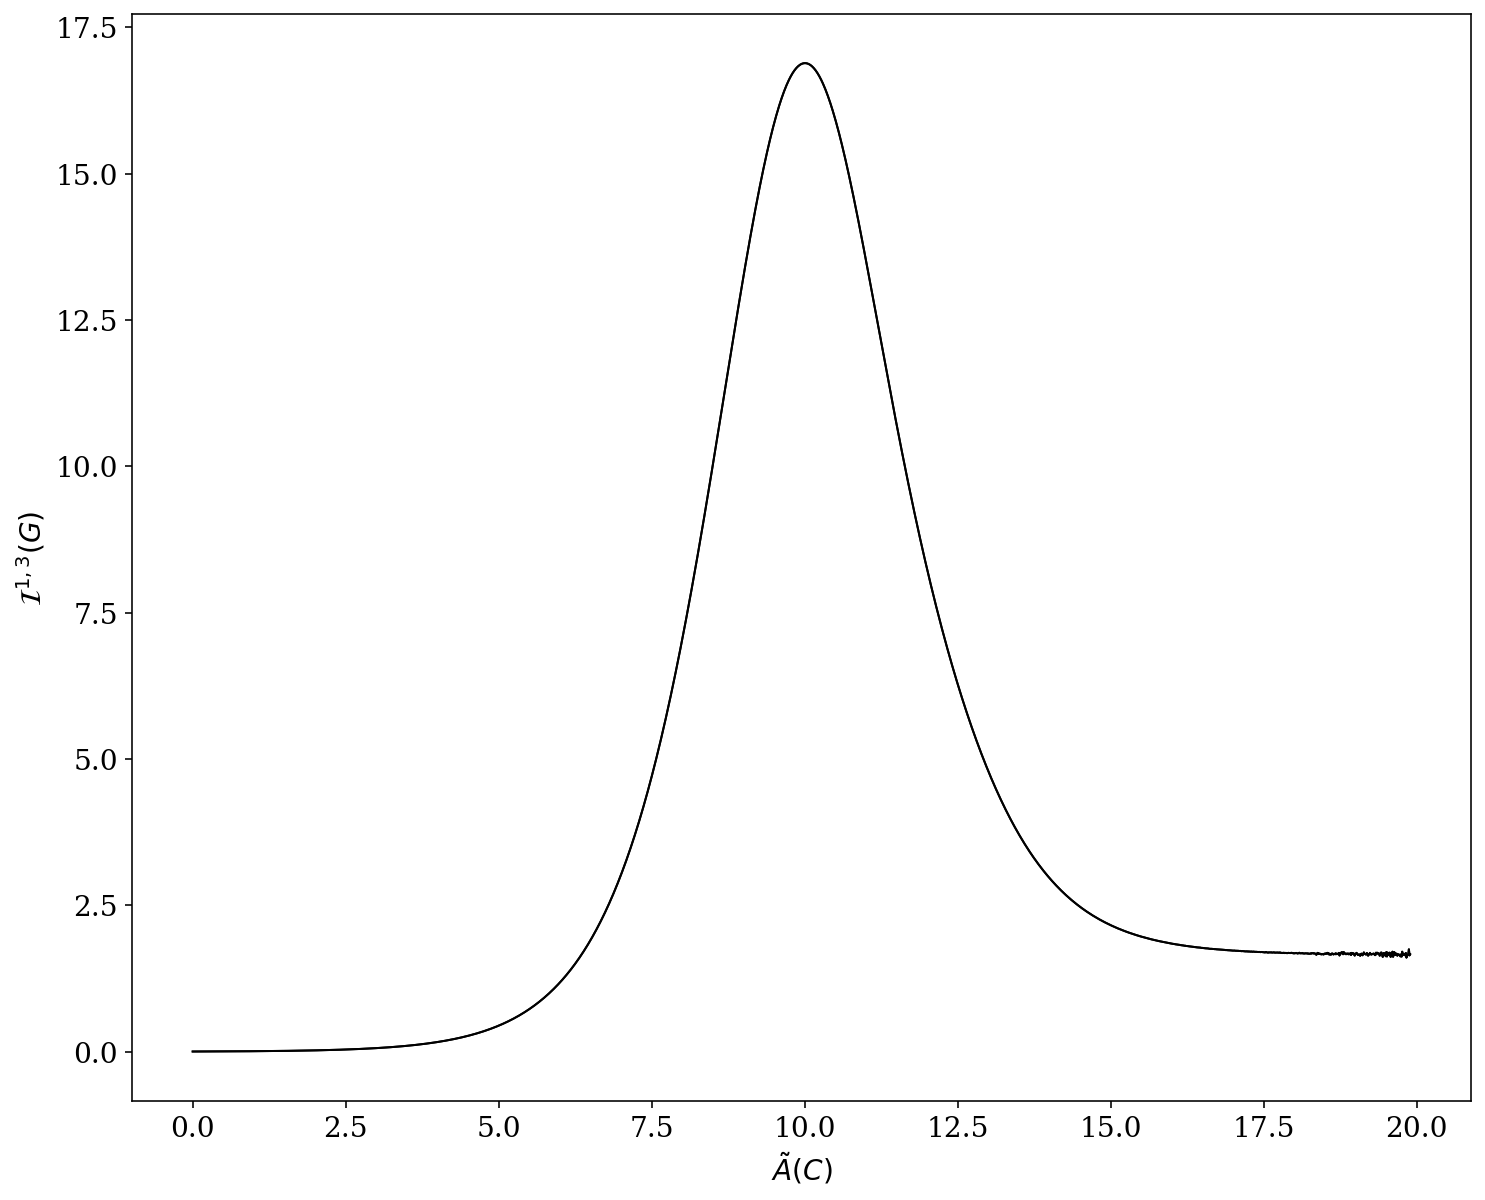

In [229]:
for i in range(len(cycles)):
    plt.plot(np.abs(all_affinities2[:,0]),all_areas2,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=1, color= 'black')
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()

In [91]:
# param_set3

seed = np.random.choice(np.arange(1,1000), size=1)
print(seed)

np.random.seed(seed)

edge_list = get_edges(G)        # list of (u,v) tuples
node_list = get_nodes(G)
# label the graph
label_dict3,label_list = get_labels(G,edge_list)
cycles = get_cycles(G_ud)
edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict3)

print(label_dict3)

# which edges are shared between cycles?
shared_edges, all_edges_f = shared_edges_cycles(cycles,
                                            edgesf,
                                            edgesb)

# set each cycle to thermodynamic equilibrium, output affinities
new_labelsf, edge_tracker, idx_tracker = equilibrium_params(cycles, edgesf, labelsf, labelsb, shared_edges)

# update graph's data structures 

# Update label_dict & build label_list in edge_list order:
new_label_dict, new_label_list = reformat_labels(edge_tracker,
                                                 idx_tracker,
                                                 new_labelsf,
                                                 label_dict3,
                                                 edge_list)

label_dict3 = new_label_dict
label_list = new_label_list

edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict3)
L  = Laplacian_all(edge_list, label_list, node_list)
pi = steady_state_spectrum(L)

cycle_idx = 0
edge_idx = 2

print(edgesf)

perturb_edge = edgesf[cycle_idx][edge_idx]

print(perturb_edge)

#----#

signal = make_observable(node_list)
alpha, beta  = 1, 3

[110]
{(1, 2): 0.00497, (1, 4): 8.928, (2, 1): 0.1793, (2, 3): 4.75, (2, 4): 11.94, (3, 4): 12.44, (3, 2): 537.1, (4, 1): 6.658, (4, 3): 1.196, (4, 2): 0.003289}
Cycle 0 affinity after solve: 0.0
Cycle 1 affinity after solve: -1.1102230246251565e-16
[[(2, 4), (4, 1), (1, 2)], [(2, 3), (3, 4), (4, 2)]]
(1, 2)


In [92]:
N = 2000
all_affinities3 = np.zeros((N,len(cycles)))
all_areas3 = np.zeros((N,1))

for i in tqdm(range(0,N)):
    
    # 1. update the edge label value for the chosen rate in label_dict, label_list    
    label_list = np.array([label_dict3[e] for e in edge_list], dtype=float)
    edgesf, edgesb, labelsf, labelsb = get_cycle_labels_edges(cycles, label_dict3)
    
    # 2. update the Laplacian
    L = Laplacian_all(edge_list,label_list,node_list)
    
    # 3. calculate and store the affinity
    prodf, prodb = calculate_cycle_products(labelsf, labelsb)
    all_affinities3[i] = calculate_affinities(prodf,prodb,cycles)
    
    # 4. calculate and store the Steinberg signature
    tau, _ = define_tau_range(L, max_points=500, cap_factor=10.0)
    pi = steady_state_spectrum(L)
    a13, a31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    all_areas3[i] = numerical_area(a13,a31)
    
    # 5. perturb chosen parameter for next iteration 
    label_dict3[perturb_edge] *= 1.01

100%|███████████████████████████████████████| 2000/2000 [02:51<00:00, 11.64it/s]


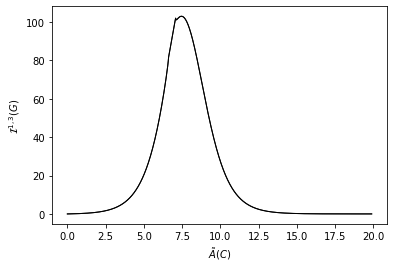

In [93]:
for i in range(len(cycles)):
    plt.plot(np.abs(all_affinities3[:,0]),all_areas3,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=1, color= 'black')
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()

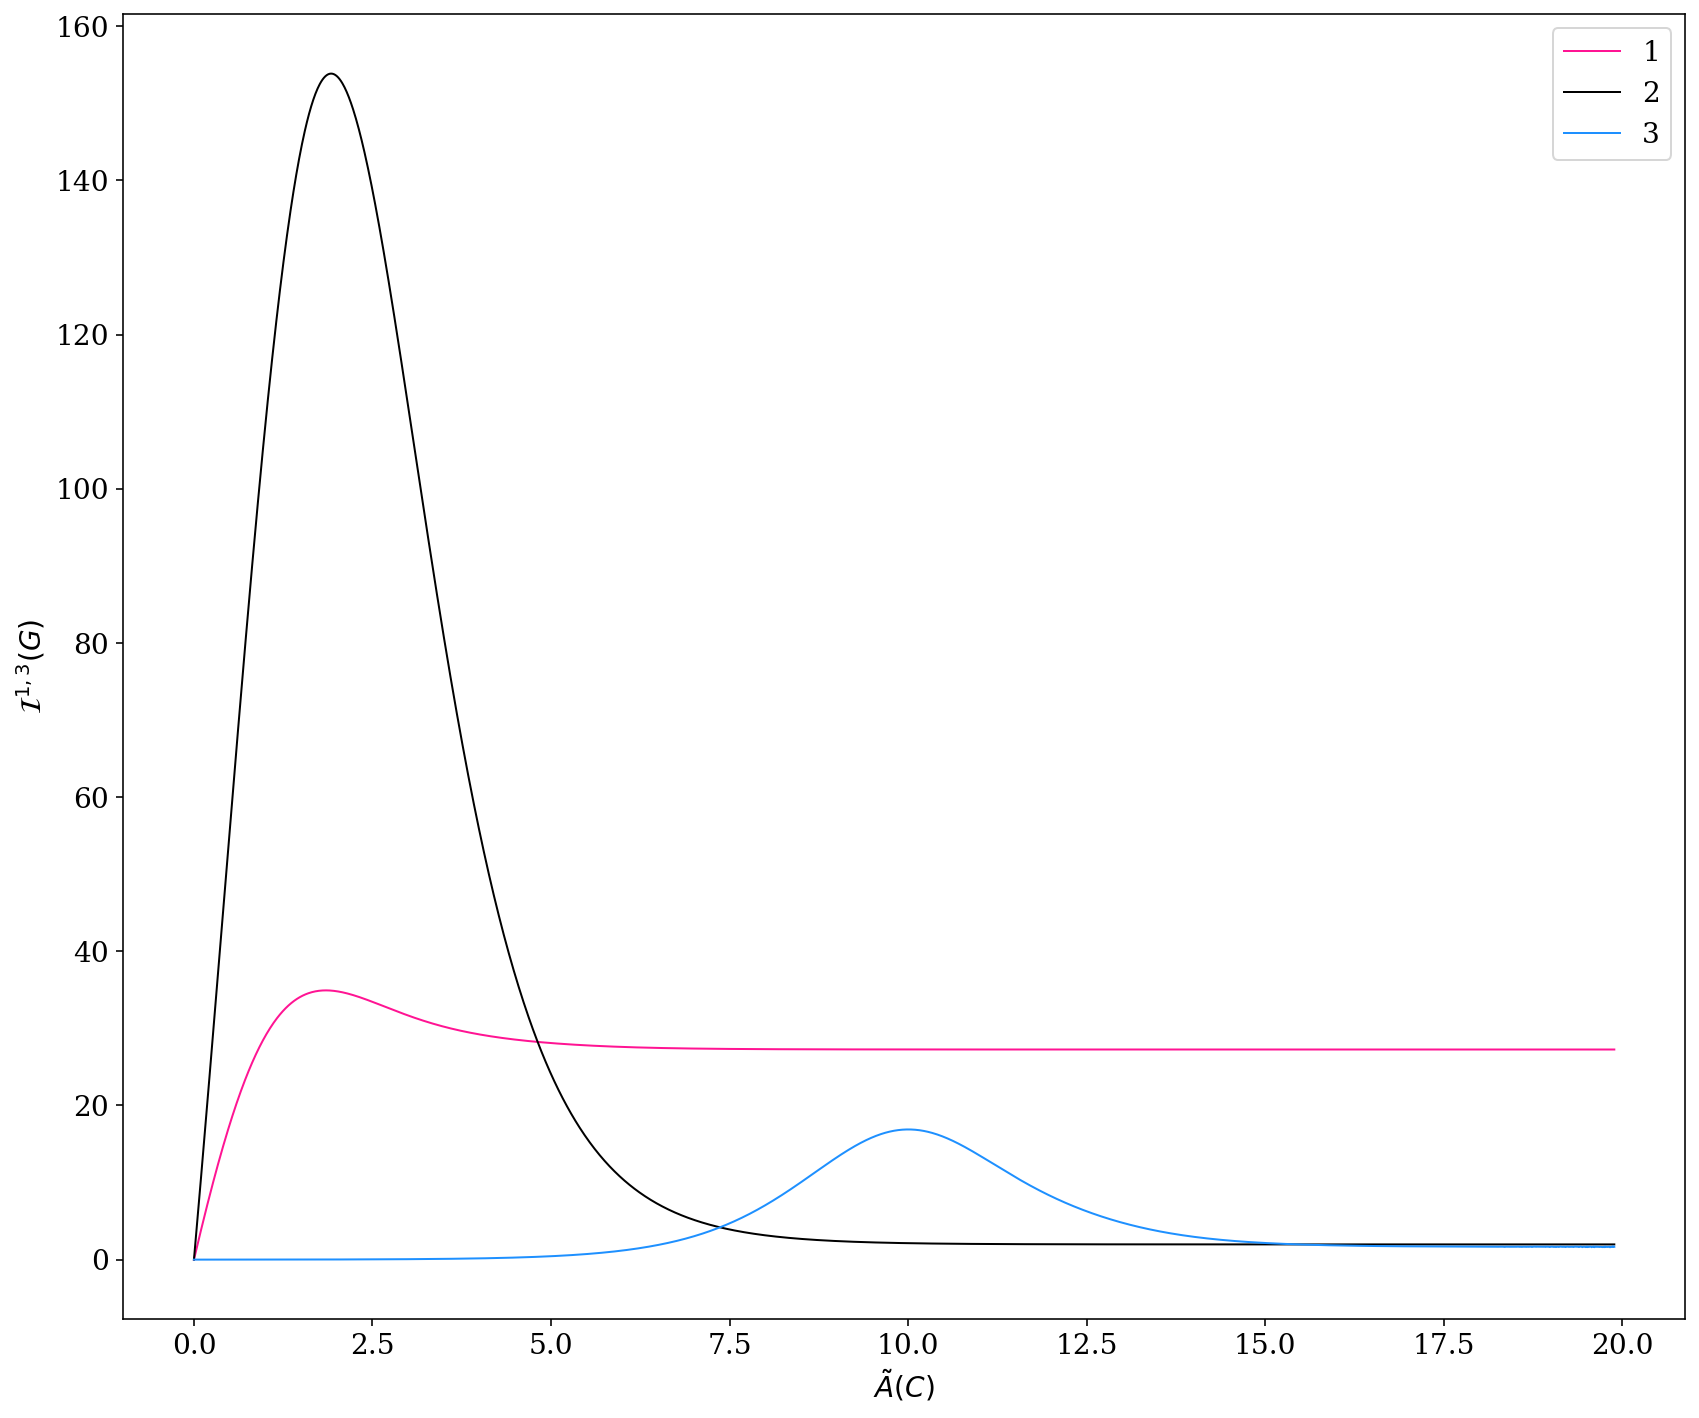

In [230]:
fig, ax = plt.subplots(figsize = (14, 12))

plt.plot(np.abs(all_affinities[:,1]),all_areas,linewidth=1, color = 'deeppink', label = '1')
plt.plot(np.abs(all_affinities1[:,0]),all_areas1,linewidth=1, color = 'black', label = '2')
plt.plot(np.abs(all_affinities2[:,0]),all_areas2,linewidth=1, color = 'dodgerblue', label = '3')

plt.legend()
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
fig.savefig('4Dnew.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')